In [71]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from sklearn.metrics import confusion_matrix
import itertools

In [2]:
current_dir = os.getcwd()

imagenes = '/Users/gbv/Dropbox/My Mac (iMac.local)/Desktop/cursosAI/udemy/DeepLearning/data/mnist.npz'


In [3]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data(path=imagenes)
x_train = x_train/ 255
x_test  = x_test / 255

In [149]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

4

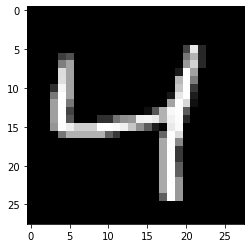

In [5]:
plt.imshow(x_train[2],cmap="gray")
y_train[2]

In [6]:
# x_train[2]

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation="sigmoid"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10,activation="softmax")
])

In [8]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"]
)


In [9]:
len(x_train)

60000

In [10]:
r  = model.fit(x_train,y_train, validation_data=(x_test,y_test),epochs=10,batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 2s 949us/step - loss: 0.7294 - accuracy: 0.7970 - val_loss: 0.2360 - val_accuracy: 0.9313
Epoch 2/10
1875/1875 [==============================] - 1s 688us/step - loss: 0.2503 - accuracy: 0.9272 - val_loss: 0.1757 - val_accuracy: 0.9480
Epoch 3/10
1875/1875 [==============================] - 1s 715us/step - loss: 0.1808 - accuracy: 0.9470 - val_loss: 0.1352 - val_accuracy: 0.9592
Epoch 4/10
1875/1875 [==============================] - 1s 695us/step - loss: 0.1468 - accuracy: 0.9572 - val_loss: 0.1107 - val_accuracy: 0.9668
Epoch 5/10
1875/1875 [==============================] - 1s 690us/step - loss: 0.1198 - accuracy: 0.9651 - val_loss: 0.1005 - val_accuracy: 0.9691
Epoch 6/10
1875/1875 [==============================] - 1s 693us/step - loss: 0.1020 - accuracy: 0.9696 - val_loss: 0.0906 - val_accuracy: 0.9721
Epoch 7/10
1875/1875 [==============================] - 1s 711us/step - loss: 0.0880 - accuracy: 0.9739 - val_loss: 0.0841 -

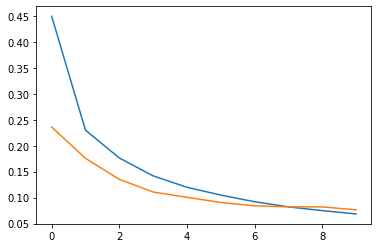

In [11]:
plt.plot(r.history["loss"],label="loss")
plt.plot(r.history["val_loss"],label="val_los")

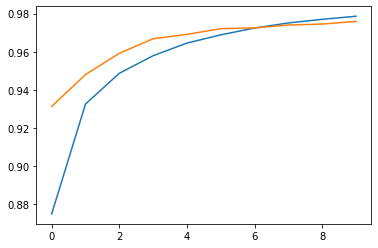

In [12]:
plt.plot(r.history["accuracy"],label="accuracy")
plt.plot(r.history["val_accuracy"],label="val_accuracy")

In [13]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 471us/step - loss: 0.0763 - accuracy: 0.9759


[0.076346755027771, 0.9758999943733215]

In [27]:
x_test[17:18].shape

(1, 28, 28)

array([9])

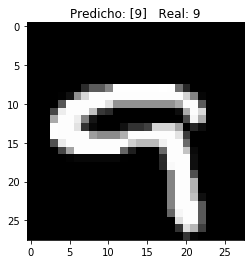

In [240]:
numero = np.random.randint(0,6000)
evaluado = x_test[numero:numero+1]
real = y_test[numero]
predicho = model.predict(evaluado).argmax(axis=1)
plt.imshow(x_test[numero],cmap="gray")
plt.title("Predicho: %s   Real: %s"%(predicho,real))
predicho

In [184]:
y_test[numero]


3

Confusion matrix without normalization
[[ 971    0    2    1    0    1    3    1    1    0]
 [   0 1120    3    1    0    1    2    1    7    0]
 [   5    0 1006    3    3    0    2    6    7    0]
 [   0    0    4  993    0    2    0    8    2    1]
 [   0    0    4    0  957    0    7    2    2   10]
 [   3    0    0   12    3  859    6    2    4    3]
 [   6    3    2    0    4    5  935    0    3    0]
 [   2    3   10    3    2    0    0 1003    0    5]
 [   6    1    2    8    4    3    1    4  944    1]
 [   3    3    0    8   14    2    0    8    0  971]]


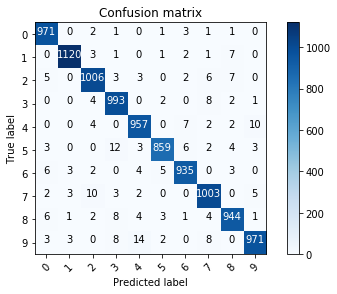

In [87]:
def plot_confusion_matrix(cm,classes,
                         normalize=False,
                         title="Confusion matrix",
                         cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:,np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix without normalization")
    print(cm)
    plt.imshow(cm,interpolation="nearest",cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)
    fmt = "0.2f" if normalize else "d"
    thresh = cm.max()/2.
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i,format(cm[i,j],fmt),
                horizontalalignment="center",
                color="white" if cm[i,j] >  thresh else "black")
    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()
    
p_test = model.predict(x_test).argmax(axis=1)
cm  =  confusion_matrix(y_test,p_test)
plot_confusion_matrix(cm, list(range(10)),normalize=False)

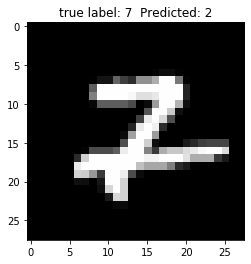

In [127]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i],cmap="gray")
plt.title("true label: %s  Predicted: %s" % (y_test[i],p_test[i]));